# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import keras
import vis
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K

tf.set_random_seed(42)

Using TensorFlow backend.


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
testX.shape

(10000, 28, 28)

In [0]:
train_filter_04 = np.where((trainY < 5 ))
test_filter_04 = np.where((testY < 5))

In [0]:
trainX_04, trainY_04 = trainX[train_filter_04], trainY[train_filter_04]
testX_04, testY_04 = testX[test_filter_04], testY[test_filter_04]

In [0]:
train_filter_59 = np.where((trainY >= 5 ))
test_filter_59 = np.where((testY >= 5))

In [0]:
trainX_59, trainY_59 = trainX[train_filter_59], trainY[train_filter_59]
testX_59, testY_59 = testX[test_filter_59], testY[test_filter_59]

In [0]:
trainY_59 = trainY_59 - 5
testY_59 = testY_59 - 5

## 3. Print x_train, y_train, x_test and y_test for both the datasets

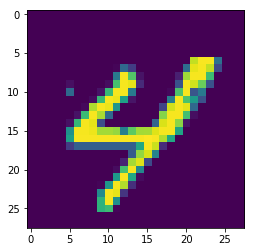

In [9]:
plt.imshow(trainX_04[50], interpolation='nearest')
plt.show()

In [10]:
trainY_04[50]

4

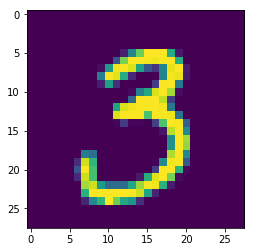

In [11]:
plt.imshow(testX_04[50], interpolation='nearest')
plt.show()

In [12]:
testY_04[50]

3

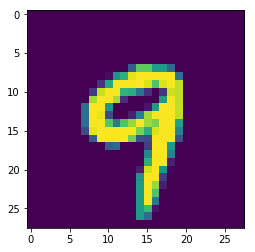

In [13]:
plt.imshow(trainX_59[50], interpolation='nearest')
plt.show()

In [14]:
trainY_59[50]

4

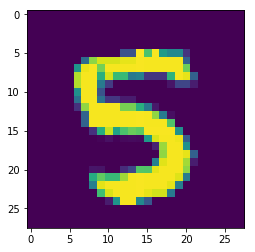

In [15]:
plt.imshow(testX_59[55], interpolation='nearest')
plt.show()

In [16]:
trainY_59[55]

0

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

*Consider only trainX_04 / trainY_04 & testX_04 / testY_04*

In [0]:
trainX_04_conv = trainX_04.reshape(trainX_04.shape[0], 28, 28, 1)
testX_04_conv = testX_04.reshape(testX_04.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
trainX_04_conv =  trainX_04_conv.astype("float32") / 255
testX_04_conv = testX_04_conv.astype("float32") / 255


## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
trainY_04_class = keras.utils.to_categorical(trainY_04, 5)
testY_04_class = keras.utils.to_categorical(testY_04, 5)

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [20]:
model_04 = Sequential()
model_04.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),name='conv_1'))
model_04.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model_04.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))
model_04.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model_04.add(Dropout(0.25,name='drop_1'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [0]:
model_04.add(Flatten())
model_04.add(Dense(128, activation='relu',name='dense_1'))
model_04.add(Dropout(0.5, name='drop_2'))
model_04.add(Dense(5, activation='softmax',name='dense_2'))

In [22]:
model_04.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 32)        9248      
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 5, 5, 32)          0         
_________________________________________________________________
drop_1 (Dropout)             (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

## 9. Print the training and test accuracy

In [0]:
model_04.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [24]:
%%time 
output_04 = model_04.fit(trainX_04_conv, trainY_04_class, batch_size=512, epochs=5, verbose=1,
                    validation_data=(testX_04_conv, testY_04_class))

Instructions for updating:
Use tf.cast instead.
Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 3s 94us/step - loss: 1.5560 - acc: 0.3035 - val_loss: 1.4280 - val_acc: 0.6252
Epoch 2/5
30596/30596 [==============================] - 1s 36us/step - loss: 1.3288 - acc: 0.5249 - val_loss: 1.0377 - val_acc: 0.8887
Epoch 3/5
30596/30596 [==============================] - 1s 35us/step - loss: 0.9624 - acc: 0.6782 - val_loss: 0.5465 - val_acc: 0.9284
Epoch 4/5
30596/30596 [==============================] - 1s 36us/step - loss: 0.6629 - acc: 0.7773 - val_loss: 0.3147 - val_acc: 0.9434
Epoch 5/5
30596/30596 [==============================] - 1s 36us/step - loss: 0.5074 - acc: 0.8307 - val_loss: 0.2252 - val_acc: 0.9525
CPU times: user 5.22 s, sys: 1.89 s, total: 7.11 s
Wall time: 7.58 s


## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [25]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_04.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_04.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
max_1
False
conv_2
False
max_2
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_2
True


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [0]:
trainX_59_conv = trainX_59.reshape(trainX_59.shape[0], 28, 28, 1)
testX_59_conv = testX_59.reshape(testX_59.shape[0], 28, 28, 1)

In [0]:
trainX_59_conv =  trainX_59_conv.astype("float32") / 255
testX_59_conv = testX_59_conv.astype("float32") / 255

In [0]:
trainY_59_class = keras.utils.to_categorical(trainY_59, 5)
testY_59_class = keras.utils.to_categorical(testY_59, 5)

## 12. Print the accuracy for classification of digits 5 to 9

In [29]:
%%time 
output_04 = model_04.fit(trainX_59_conv, trainY_59_class, batch_size=512, epochs=5, verbose=1,
                    validation_data=(testX_59_conv, testY_59_class))

Train on 29404 samples, validate on 4861 samples
Epoch 1/5
 5120/29404 [====>.........................] - ETA: 0s - loss: 1.8944 - acc: 0.3225

/usr/local/lib/python2.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


29404/29404 [==============================] - 1s 37us/step - loss: 1.4172 - acc: 0.4439 - val_loss: 0.9407 - val_acc: 0.7398
Epoch 2/5
29404/29404 [==============================] - 1s 36us/step - loss: 0.9941 - acc: 0.6321 - val_loss: 0.6413 - val_acc: 0.8330
Epoch 3/5
29404/29404 [==============================] - 1s 36us/step - loss: 0.7821 - acc: 0.7248 - val_loss: 0.4768 - val_acc: 0.8739
Epoch 4/5
29404/29404 [==============================] - 1s 36us/step - loss: 0.6533 - acc: 0.7709 - val_loss: 0.3884 - val_acc: 0.8926
Epoch 5/5
29404/29404 [==============================] - 1s 35us/step - loss: 0.5642 - acc: 0.8055 - val_loss: 0.3338 - val_acc: 0.9010
CPU times: user 3.63 s, sys: 1.22 s, total: 4.85 s
Wall time: 5.28 s


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Read file into pandas dataframe
tweets_df = pd.read_csv('/content/gdrive/My Drive/tweets.csv',encoding = 'ISO-8859-1')

In [0]:
tweets_df.dropna(inplace = True)

In [33]:
tweets_df.count()

tweet_text                                            3291
emotion_in_tweet_is_directed_at                       3291
is_there_an_emotion_directed_at_a_brand_or_product    3291
dtype: int64

### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
tweets_df['text'] = [preprocess(text) for text in tweets_df.tweet_text]

In [36]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [0]:
import re
import nltk
#nltk.download('stopwords')

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

In [0]:
# Step 1 to remove HTML and other Tags
tweets_df['tweet_text'] = [BeautifulSoup(text).get_text() for text in tweets_df['tweet_text'] ]

In [0]:
# Step 2 to remove all non english characters and also remove stop words, converting all words to lower case
for i, row in tweets_df.iterrows():
  tweets_df['tweet_text'][i] = re.sub("[^0-9a-zA-Z]"," ",tweets_df['tweet_text'][i] )
  words = tweets_df['tweet_text'][i].lower().split()                             
  stops = set(stopwords.words("english"))                  
  meaningful_words = [w for w in words if not w in stops]   
  tweets_df['tweet_text'][i] = " ".join( meaningful_words )
  

In [40]:
print(tweets_df["tweet_text"].iloc[5])
print(tweets_df["text"].iloc[5])

sxsw starting ctia around corner googleio hop skip jump good time android fan
#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan


### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
tweets_clean_df = tweets_df[(tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [42]:
tweets_clean_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,wesley83 3g iphone 3 hrs tweeting rise austin ...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,jessedee know fludapp awesome ipad iphone app ...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,swonderlin wait ipad 2 also sale sxsw,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,sxsw hope year festival crashy year iphone app...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,sxtxstate great stuff fri sxsw marissa mayer g...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [43]:
tweets_clean_df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
count,3191,3191,3191,3191
unique,3148,9,2,3032
top,rt mention marissa mayer google connect digita...,iPad,Positive emotion,
freq,4,918,2672,151


In [44]:
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vect = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 7500) 

Creating the bag of words...



In [0]:
tweets_clean_cv_df = vect.fit_transform(tweets_clean_df['tweet_text'])
tweets_clean_cv_df = tweets_clean_cv_df.toarray()

In [46]:
print tweets_clean_cv_df.shape

(3191, 5464)


### 17. Find number of different words in vocabulary

In [47]:
vocab = vect.get_feature_names()
print len(vocab)

5464


### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [48]:
tweets_clean_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [0]:
emotions_bin = {'Positive emotion' : 1,
                'Negative emotion' : 0 }

In [50]:
tweets_clean_df['Label'] = tweets_clean_df['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotions_bin)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
tweets_clean_df.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,Label
0,wesley83 3g iphone 3 hrs tweeting rise austin ...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,jessedee know fludapp awesome ipad iphone app ...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = tweets_clean_cv_df
y = tweets_clean_df['Label']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [0]:
model_NB = GaussianNB().fit(X_train, y_train)

In [0]:
model_LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

In [58]:
model_NB.score(X_test, y_test)

0.7511737089201878

In [59]:
model_LR.score(X_test, y_test)

0.8701095461658842

## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [60]:
tweets_clean_cv_df[0]

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
Xf = tweets_clean_df['tweet_text']
yf = tweets_clean_df['Label']

In [0]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [0]:
def tokenize_predict(vect):
    X_train_dtm = vect.fit_transform(Xf_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(Xf_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, yf_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(yf_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [0]:
vect1 = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ngram_range = (1,2), \
                             max_features = 7500) 


In [66]:
tokenize_predict(vect1)

('Features: ', 7500)
('Accuracy: ', 0.8748043818466353)


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [0]:
vect2 = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             ngram_range = (1,2), \
                             max_features = 7500) 

In [68]:
tokenize_predict(vect2)

('Features: ', 7500)
('Accuracy: ', 0.8763693270735524)


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [0]:
vect3 = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             ngram_range = (1,2), \
                             max_features = 300) 

In [70]:
tokenize_predict(vect3)

('Features: ', 300)
('Accuracy: ', 0.8262910798122066)


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [0]:
vect4 = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             ngram_range = (1,2), \
                             max_features = 15000) 

In [72]:
tokenize_predict(vect4)

('Features: ', 15000)
('Accuracy: ', 0.8779342723004695)


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [0]:
vect5 = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             ngram_range = (1,2), \
                             min_df = 2, \
                             max_features = 15000) 

In [74]:
tokenize_predict(vect5)

('Features: ', 5600)
('Accuracy: ', 0.8779342723004695)
